# HRP Portfolio Optimization

In [4]:
%load_ext autoreload
%autoreload 2
# imports
from src.DataProvider import DataProvider
from src.HRP import HRP


import numpy as np
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold
from IPython.display import display




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# Fetch data
tickers = [
    "^FTSE",
    "SPY",
    "GOLD",
    "^GDAXI",
    "^RUT",
    "AAPL",
    "BAC",
    "NVDA",
    "MSTR",
    "BA",
    "FLUT",
    "TSM",
    "JPM",
    "^N225"
]
start = "2003-01-01"
end = "2023-12-31"

data_provider = DataProvider(tickers, start, end)
data = data_provider.provide()
data.head()


[*********************100%***********************]  14 of 14 completed

The dataset contains null or empty values
Pefroming cleaning


Ticker,AAPL,BA,BAC,FLUT,GOLD,JPM,MSTR,NVDA,SPY,TSM,^FTSE,^GDAXI,^N225,^RUT
Date,,,,,,,,,,,,,,
2003-01-07 00:00:00+00:00,-0.003353,-0.024319,0.001544,0.0,-0.019758,-0.005004,0.044379,-0.003011,-0.002474,0.003922,-0.010996,-0.014088,-0.006522,-0.007683
2003-01-08 00:00:00+00:00,-0.020205,0.006006,-0.004064,0.0,0.016255,-0.038434,-0.045326,-0.099473,-0.014450,-0.042968,-0.008238,-0.038477,-0.016023,-0.012387
2003-01-09 00:00:00+00:00,0.008937,0.011941,0.013086,0.0,-0.014075,0.019799,0.026706,0.017573,0.015538,0.054422,0.002344,0.014928,-0.002333,0.017657
2003-01-10 00:00:00+00:00,0.002724,-0.001475,-0.002778,0.0,0.016223,-0.007692,-0.016763,0.017270,0.002694,0.032258,0.010193,-0.000115,-0.003234,0.001263
2003-01-14 00:00:00+00:00,-0.007472,0.008862,0.009471,0.0,-0.041507,0.018457,0.067607,-0.000805,0.002901,0.033750,-0.007171,0.020212,0.009753,0.005070


<Axes: title={'center': 'Data Overview'}, xlabel='Date', ylabel='Price'>

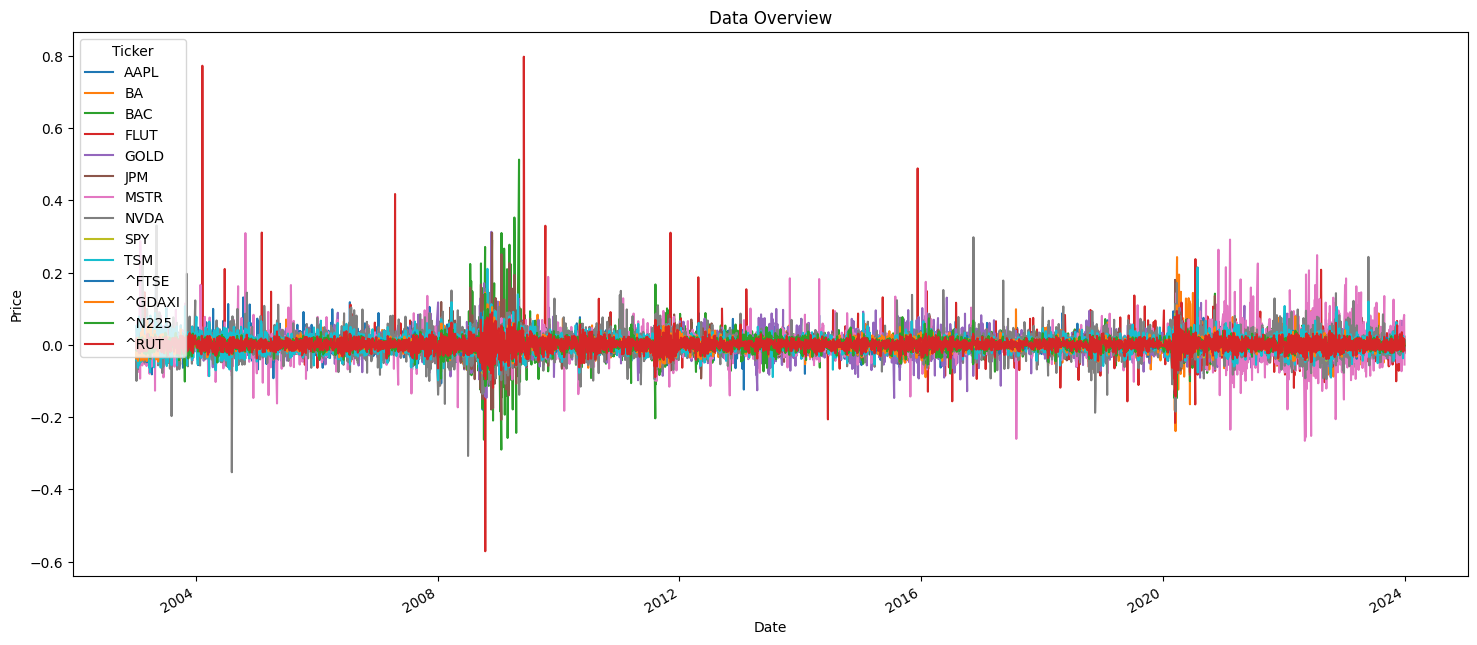

In [6]:
data.plot(figsize=(18, 8), ylabel="Price", title="Data Overview")

In [7]:
data.shape

(4853, 14)

In [ ]:
# Transformation
X = data.copy("deep")
rows = len(X)
training_rows = int(rows * 0.8) # amount of training rows (80%)
training_rows


3883

In [ ]:
X_train = X.head(training_rows)
X_test = X.tail(rows - training_rows)

# calculate percentage return 
returns = X_train.pct_change().dropna()
returns_test = X_test.pct_change().dropna()

In [ ]:
def correlaiton_distance(corr):
    dist = ((1 - corr) / 2.0) ** 0.5
    return dist

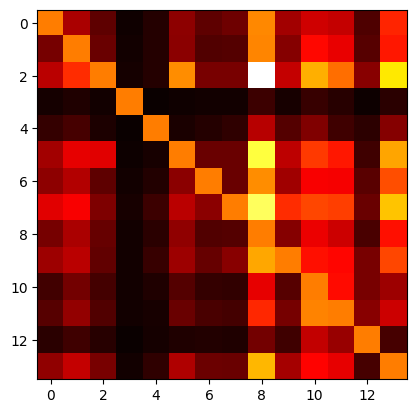

In [ ]:
sigmas = returns.cov()

D = 1 / np.sqrt(np.diag(sigmas)) # takes the inverse of sqrt of diag.
corr =  D * sigmas * D
# corr = returns.corr()

plt.imshow(corr, cmap='hot', interpolation='nearest')
plt.show()
# returns.corr()


In [ ]:
# Calculate linkage
dist = correlaiton_distance(returns.corr())
link = linkage(dist, "ward") # TODO: investigate what this does
link[0]

/var/folders/rd/6pjhbndj3_xbc_vx64hj0zh00000gn/T/ipykernel_74648/562101903.py:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = linkage(dist, "ward") # TODO: investigate what this does


array([ 8.        , 13.        ,  0.33174402,  2.        ])

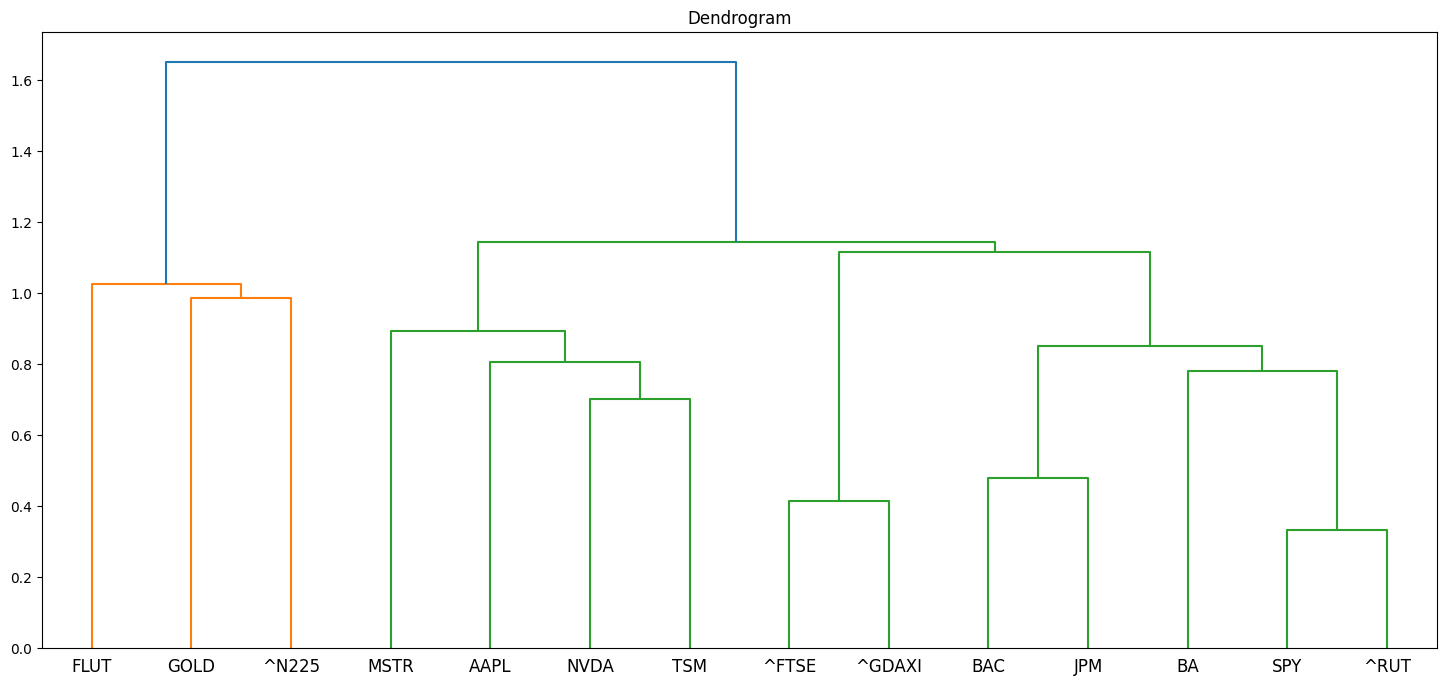

In [ ]:
# Plot dendogram
plt.figure(figsize=(18, 8))
plt.title("Dendrogram")
dendrogram(link, labels = X.columns)
plt.show()

In [ ]:
hrp = HRP()
hrp.getQuasiDiag(link)
# link[-1,1]


[3, 4, 12, 6, 0, 7, 9, 10, 11, 2, 5, 1, 8, 13]

[[ 8.         13.          0.48258795  2.        ]
 [10.         11.          0.58669767  2.        ]
 [ 2.          5.          0.65646342  2.        ]
 [14.         16.          0.92390841  4.        ]
 [ 7.          9.          0.96571469  2.        ]
 [ 0.         18.          0.95803224  3.        ]
 [17.         19.          0.99013119  7.        ]
 [ 1.         20.          0.87668318  8.        ]
 [15.         21.          1.01007706 10.        ]
 [ 6.         22.          1.17941998 11.        ]
 [ 3.          4.          1.41147804  2.        ]
 [12.         24.          1.28093577  3.        ]
 [23.         25.          1.46694586 14.        ]]
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclas

/Users/santi/Desktop/HRP-Portfolio-Optimization/src/HRPPortfolio.py:32: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(eucledian_df, 'centroid')
/Users/santi/Desktop/HRP-Portfolio-Optimization/src/HRPPortfolio.py:32: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(eucledian_df, 'centroid')


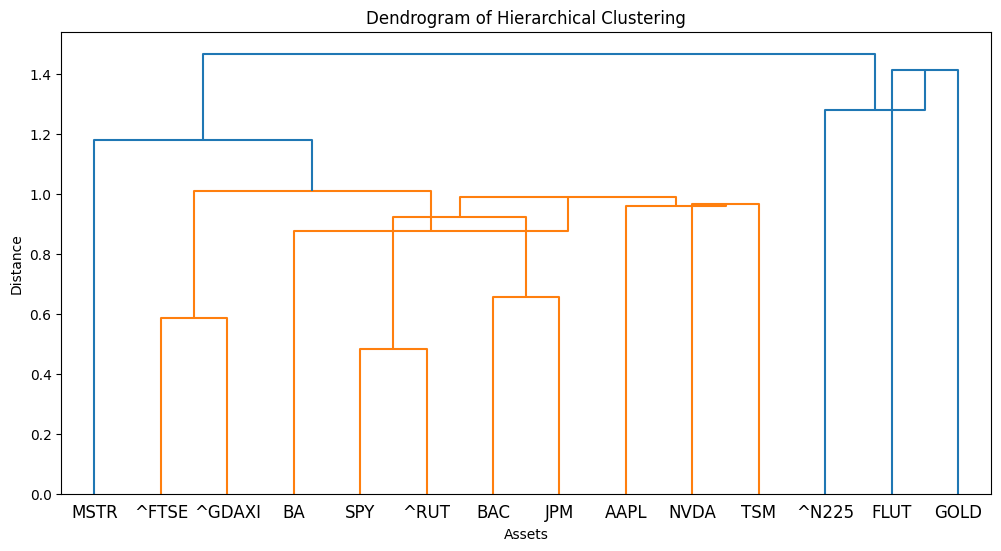

[8, 13, 10, 11, 2, 5, 7, 9, 0, 1, 6, 3, 4, 12]


/Users/santi/Desktop/HRP-Portfolio-Optimization/src/HRPPortfolio.py:32: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(eucledian_df, 'centroid')


In [15]:
from src.HRPPortfolio import HRPPortfolio
HRP_data = HRPPortfolio(data)
H_Clustering = HRP_data.hierarchical_clustering()
print(H_Clustering)
print(dir(HRP_data))
x = HRP_data.plot_dendrogram()
# Plot dendrogram
plt.figure(figsize=(12, 6))
plt.title("Dendrogram of Hierarchical Clustering")
dendrogram(x, labels=data.columns, leaf_rotation=90)
plt.xlabel("Assets")
plt.ylabel("Distance")
plt.show()
Cluster_order = HRP_data.get_cluster_order()
print(Cluster_order)
#print(len(Cluster_order))
#Q_Diagonalization = HRP_data.quasi_diagonalization()
#merged_clusters = {}
#Weights = HRP_data.hrp_recursive_bisection(Q_Diagonalization, Cluster_order, H_Clustering)

#print(Weights)



